* Guy Kabiri (גיא כבירי)
* 312252224
* https://www.kaggle.com/guykabiri


# Intro
In this competition, we need to predict the price of houses in Ames, Iowa.
We have a dataset of 80 features we have to analyze to understand which features will help to predict and which are just 'white noise'.  
In this assignment, I will use K-Fold Cross-Validation to validate each step in the tuning of the hyper-parameters and to select the best set of features for the final model, and as well, forward feature selection method to choose the features.

# Package Updates

In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


# Import

In [ ]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tqdm.auto import tqdm

from scipy import stats
from scipy.stats import norm


# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

In [ ]:
train_df = pd.DataFrame(pd.read_csv('train.csv'))
test_df = pd.DataFrame(pd.read_csv('test.csv'))

In [ ]:
display(train_df)
display(test_df)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]

Let's see how the data looks.

In [ ]:
display(train_df.describe(include="O").T)
display(train_df.describe().T)

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

count           mean  ...        75%       max
Id             1460.0     730.500000  ...    1095.25    1460.0
MSSubClass     1460.0      56.897260  ...      70.00     190.0
LotFrontage    1201.0      70.049958  ...      80.00     313.0
LotArea        1460.0   10516.828082  ...   11601.50  215245.0
OverallQual    1460.0       6.099315  ...       7.00      10.0
OverallCond    1460.0       5.575342  ...       6.00       9.0
YearBuilt      1460.0    1971.267808  ...    2000.00    2010.0
YearRemodAdd   1460.0    1984.865753  ...    2004.00    2010.0
MasVnrArea     1452.0     103.685262  ...     166.00    1600.0
BsmtFinSF1     1460.0     443.639726  ...     712.25    5644.0
BsmtFinSF2     1460.0      46.549315  ...       0.00    1474.0
BsmtUnfSF      1460.0     567.240411  ...     808.00    2336.0
TotalBsmtSF    1460.0    1057.429452  ...    1298.25    6110.0
1stFlrSF       1460.0    1162.626712  ...    1391.25    4692.0
2ndFlrSF       1460.0     346.992466  ...     728.00    2065.0
LowQualFinSF   1460.0       5.844521  ...       0.00     572.0
GrLivArea      1460.0    1515.463699  ...    1776.75    5642.0
BsmtFullBath   1460.0       0.425342  ...       1.00       3.0
BsmtHalfBath   1460.0       0.057534  ...       0.00       2.0
FullBath       1460.0       1.565068  ...       2.00       3.0
HalfBath       1460.0       0.382877  ...       1.00       2.0
BedroomAbvGr   1460.0       2.866438  ...       3.00       8.0
KitchenAbvGr   1460.0       1.046575  ...       1.00       3.0
TotRmsAbvGrd   1460.0       6.517808  ...       7.00      14.0
Fireplaces     1460.0       0.613014  ...       1.00       3.0
GarageYrBlt    1379.0    1978.506164  ...    2002.00    2010.0
GarageCars     1460.0       1.767123  ...       2.00       4.0
GarageArea     1460.0     472.980137  ...     576.00    1418.0
WoodDeckSF     1460.0      94.244521  ...     168.00     857.0
OpenPorchSF    1460.0      46.660274  ...      68.00     547.0
EnclosedPorch  1460.0      21.954110  ...       0.00     552.0
3SsnPorch      1460.0       3.409589  ...       0.00     508.0
ScreenPorch    1460.0      15.060959  ...       0.00     480.0
PoolArea       1460.0       2.758904  ...       0.00     738.0
MiscVal        1460.0      43.489041  ...       0.00   15500.0
MoSold         1460.0       6.321918  ...       8.00      12.0
YrSold         1460.0    2007.815753  ...    2009.00    2010.0
SalePrice      1460.0  180921.195890  ...  214000.00  755000.0

[38 rows x 8 columns]

Now, let's see the type of features.

In [ ]:
def count_numerical_categorical(df, drop_list):
  count = 0
  for key in df.drop(drop_list, axis=1).keys():
    if np.issubdtype(df[key].dtype, np.number):
      count += 1
  cat = len(df.drop(drop_list, axis=1).keys()) - count
  return count, cat

In [ ]:
num, cat = count_numerical_categorical(train_df, ["Id", "SalePrice"])
print("There are {} numerical features, and {} categorical\n".format(num, cat))

There are 36 numerical features, and 43 categorical



# Data Exploration

Let's see the distribution of the `SalePrice` to get perspective on the prices.

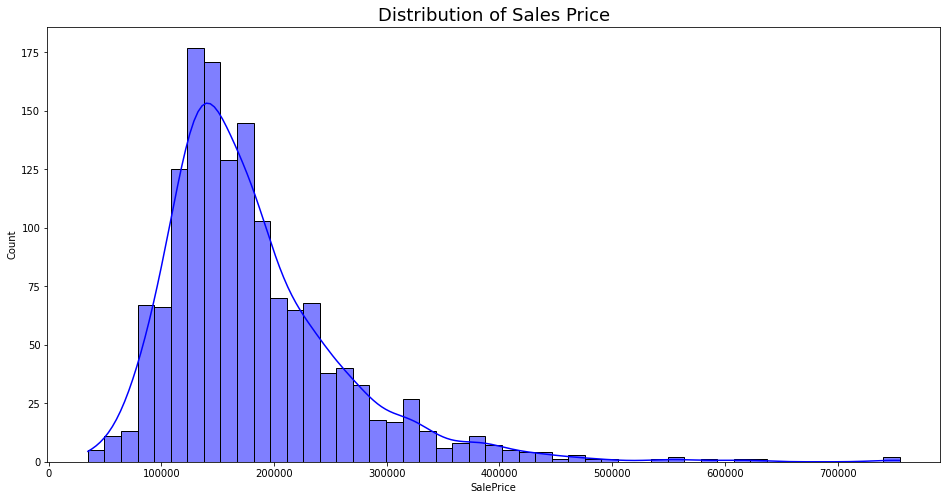

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(train_df['SalePrice'], kde=True, color="blue")
plt.title('Distribution of Sales Price', fontsize=18)
plt.show()

We can see that `SalePrice` does not follow a normal distribution, it will have to normalize later. 

## Numerical Feature Analysis
Let's see the correlation of features.

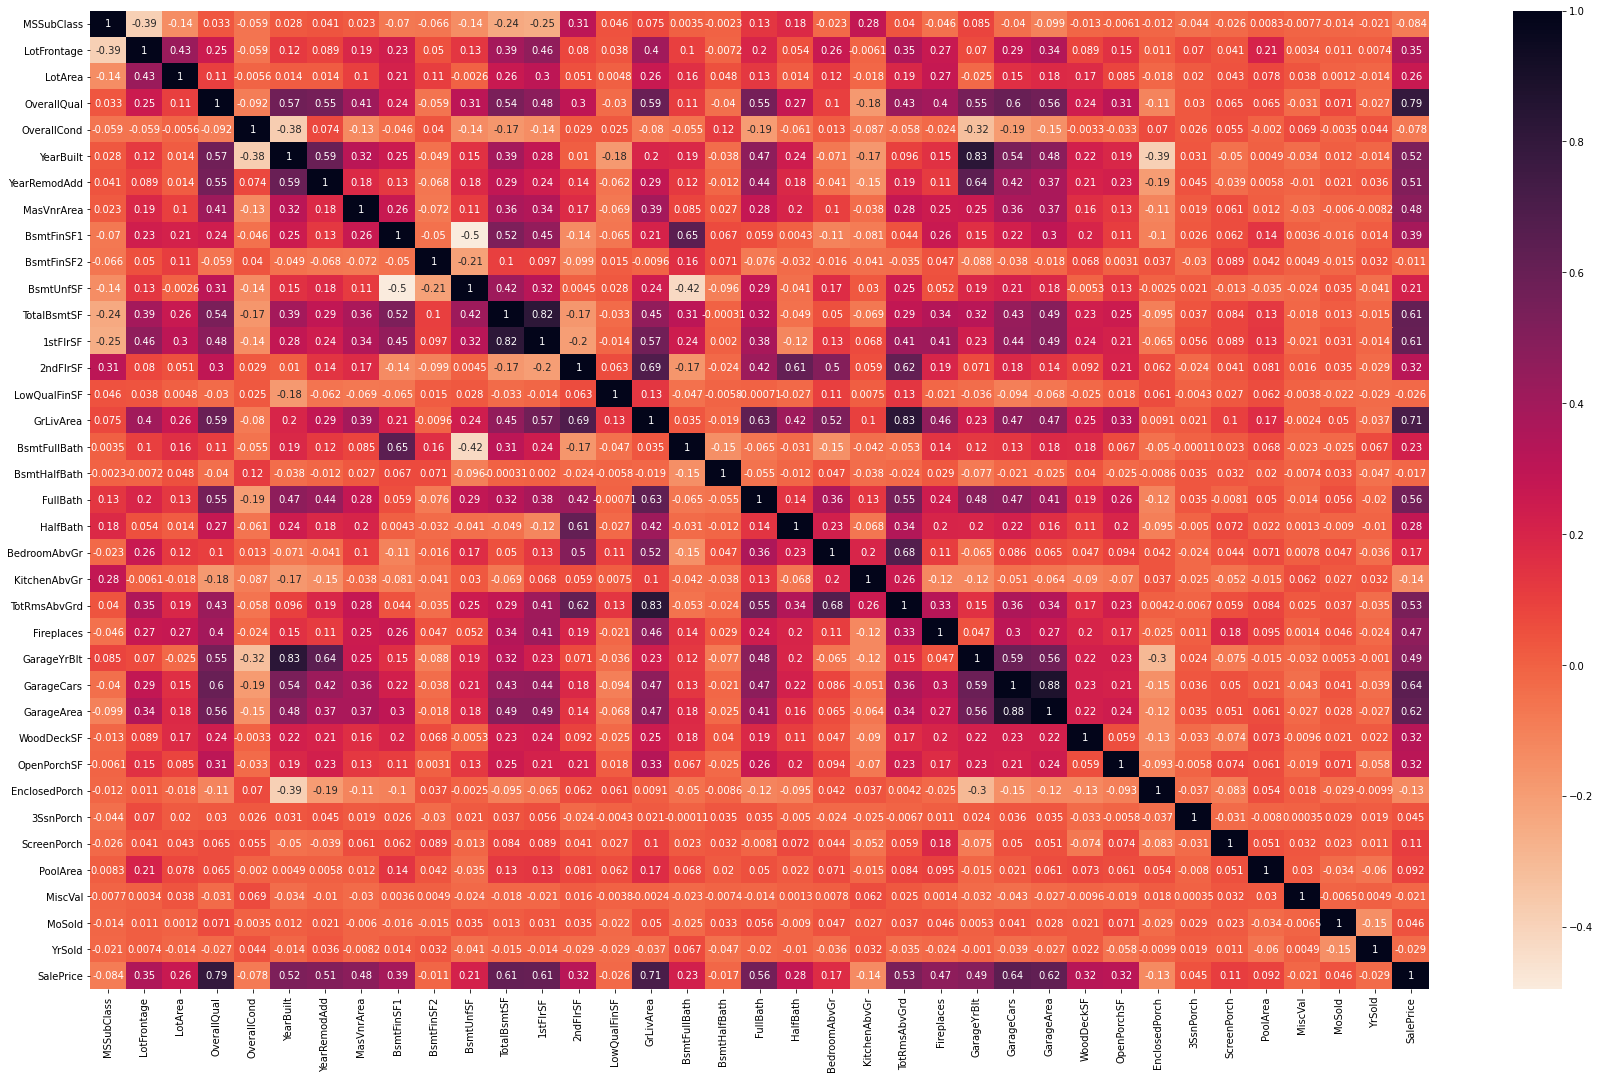

In [ ]:
plt.figure(figsize=(30, 18))
sns.heatmap(train_df.drop("Id", axis=1).corr(), annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

Few things are very noticable:  
* `GarageYrBlt` which represent the year the garage was build is highly correlated (0.82) with `YearBuilt` which represent the build year of the house. It means that in most of properties in the dataset, the garage was build at the same time as the house. In that case, we can drop the `GarageYrBlt` feature as we have too many features.
* `1stFlrSF` which indicates the square foot of the 1st floor of a house is highly correlated (0.81) with `TotalBsmtSF` which represents the square foot of the basement. It means that in most houses the basement has the same size as the upper floor.
* `GarageArea` and `GarageCars` are highly correlated (0.88), we might want to drop one of them as well.  


In [ ]:
def drop_features(dataframes, features):
  for df in dataframes:
    df.drop(features, axis=1, inplace=True)
  return dataframes

def replace_feature_vals(dataframes, feature, new_dict):
  for df in dataframes:
    df[feature] = df[feature].replace(new_dict)
  return dataframes

def combine_categorical_by_threshold(dataframes, feature, threshhold):
  for df in dataframes:
    counts = df[feature].value_counts()
    counts = zip(df[feature].value_counts().index, counts)
    for name, val in counts:
      if val > threshhold:
        continue
      df[feature] = df[feature].replace({name : "Other"})
  return dataframes

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["GarageYrBlt", "TotalBsmtSF", "GarageArea"])

Let's plot the disributes of the numerical features.

In [ ]:
def get_numerical(df, exclude=[]):
  df = df.drop(exclude, axis=1)
  numerical = []
  for key in df.keys():
    if np.issubdtype(df[key].dtype, np.number):
      numerical += [key]
  return numerical

In [ ]:
def plot_numerical(df, features):
  df = df[features]
  cols = 4
  rows =  int(len(df.keys()) / cols) + 1
  fig = make_subplots(cols=cols, rows=rows)
  for i, key in enumerate(features):
    x, y = i//cols + 1, i%cols + 1
    graph = go.Histogram(x=df[key], name=key)
    fig.add_trace(graph, row=x, col=y)
    fig.update_xaxes(title_text=key, row=x, col=y)

  fig.update_layout(height=2000, width=1000, title_text="Distribution of Features")
  fig.show()

In [ ]:
plot_numerical(train_df, get_numerical(train_df, ["Id", "SalePrice"]))

Okay, let's see how each numerical feature affect the price of the house.

In [ ]:
def plot_numerical_by_target(df, target, features):
  df = df[features + [target]]
  cols = 5
  rows =  int(len(features) / cols) + 1
  fig, ax = plt.subplots(rows, cols)
  colors = sns.color_palette("rocket_r", as_cmap=True)
  for i, key in enumerate(features):
    sns.scatterplot(data=df, x=key, y=target, ax=ax[i//cols, i%cols], hue=target, palette=colors)
    ax[i//cols, i%cols].xaxis.set_tick_params(rotation=45)

  for i in range(len(features), rows*cols):   # delete the empty graphs
    fig.delaxes(ax.flatten()[i])

  plt.subplots_adjust(top=1.5, bottom=0, left=0, right=1)
  fig.set_size_inches(20, 20)
  fig.show()

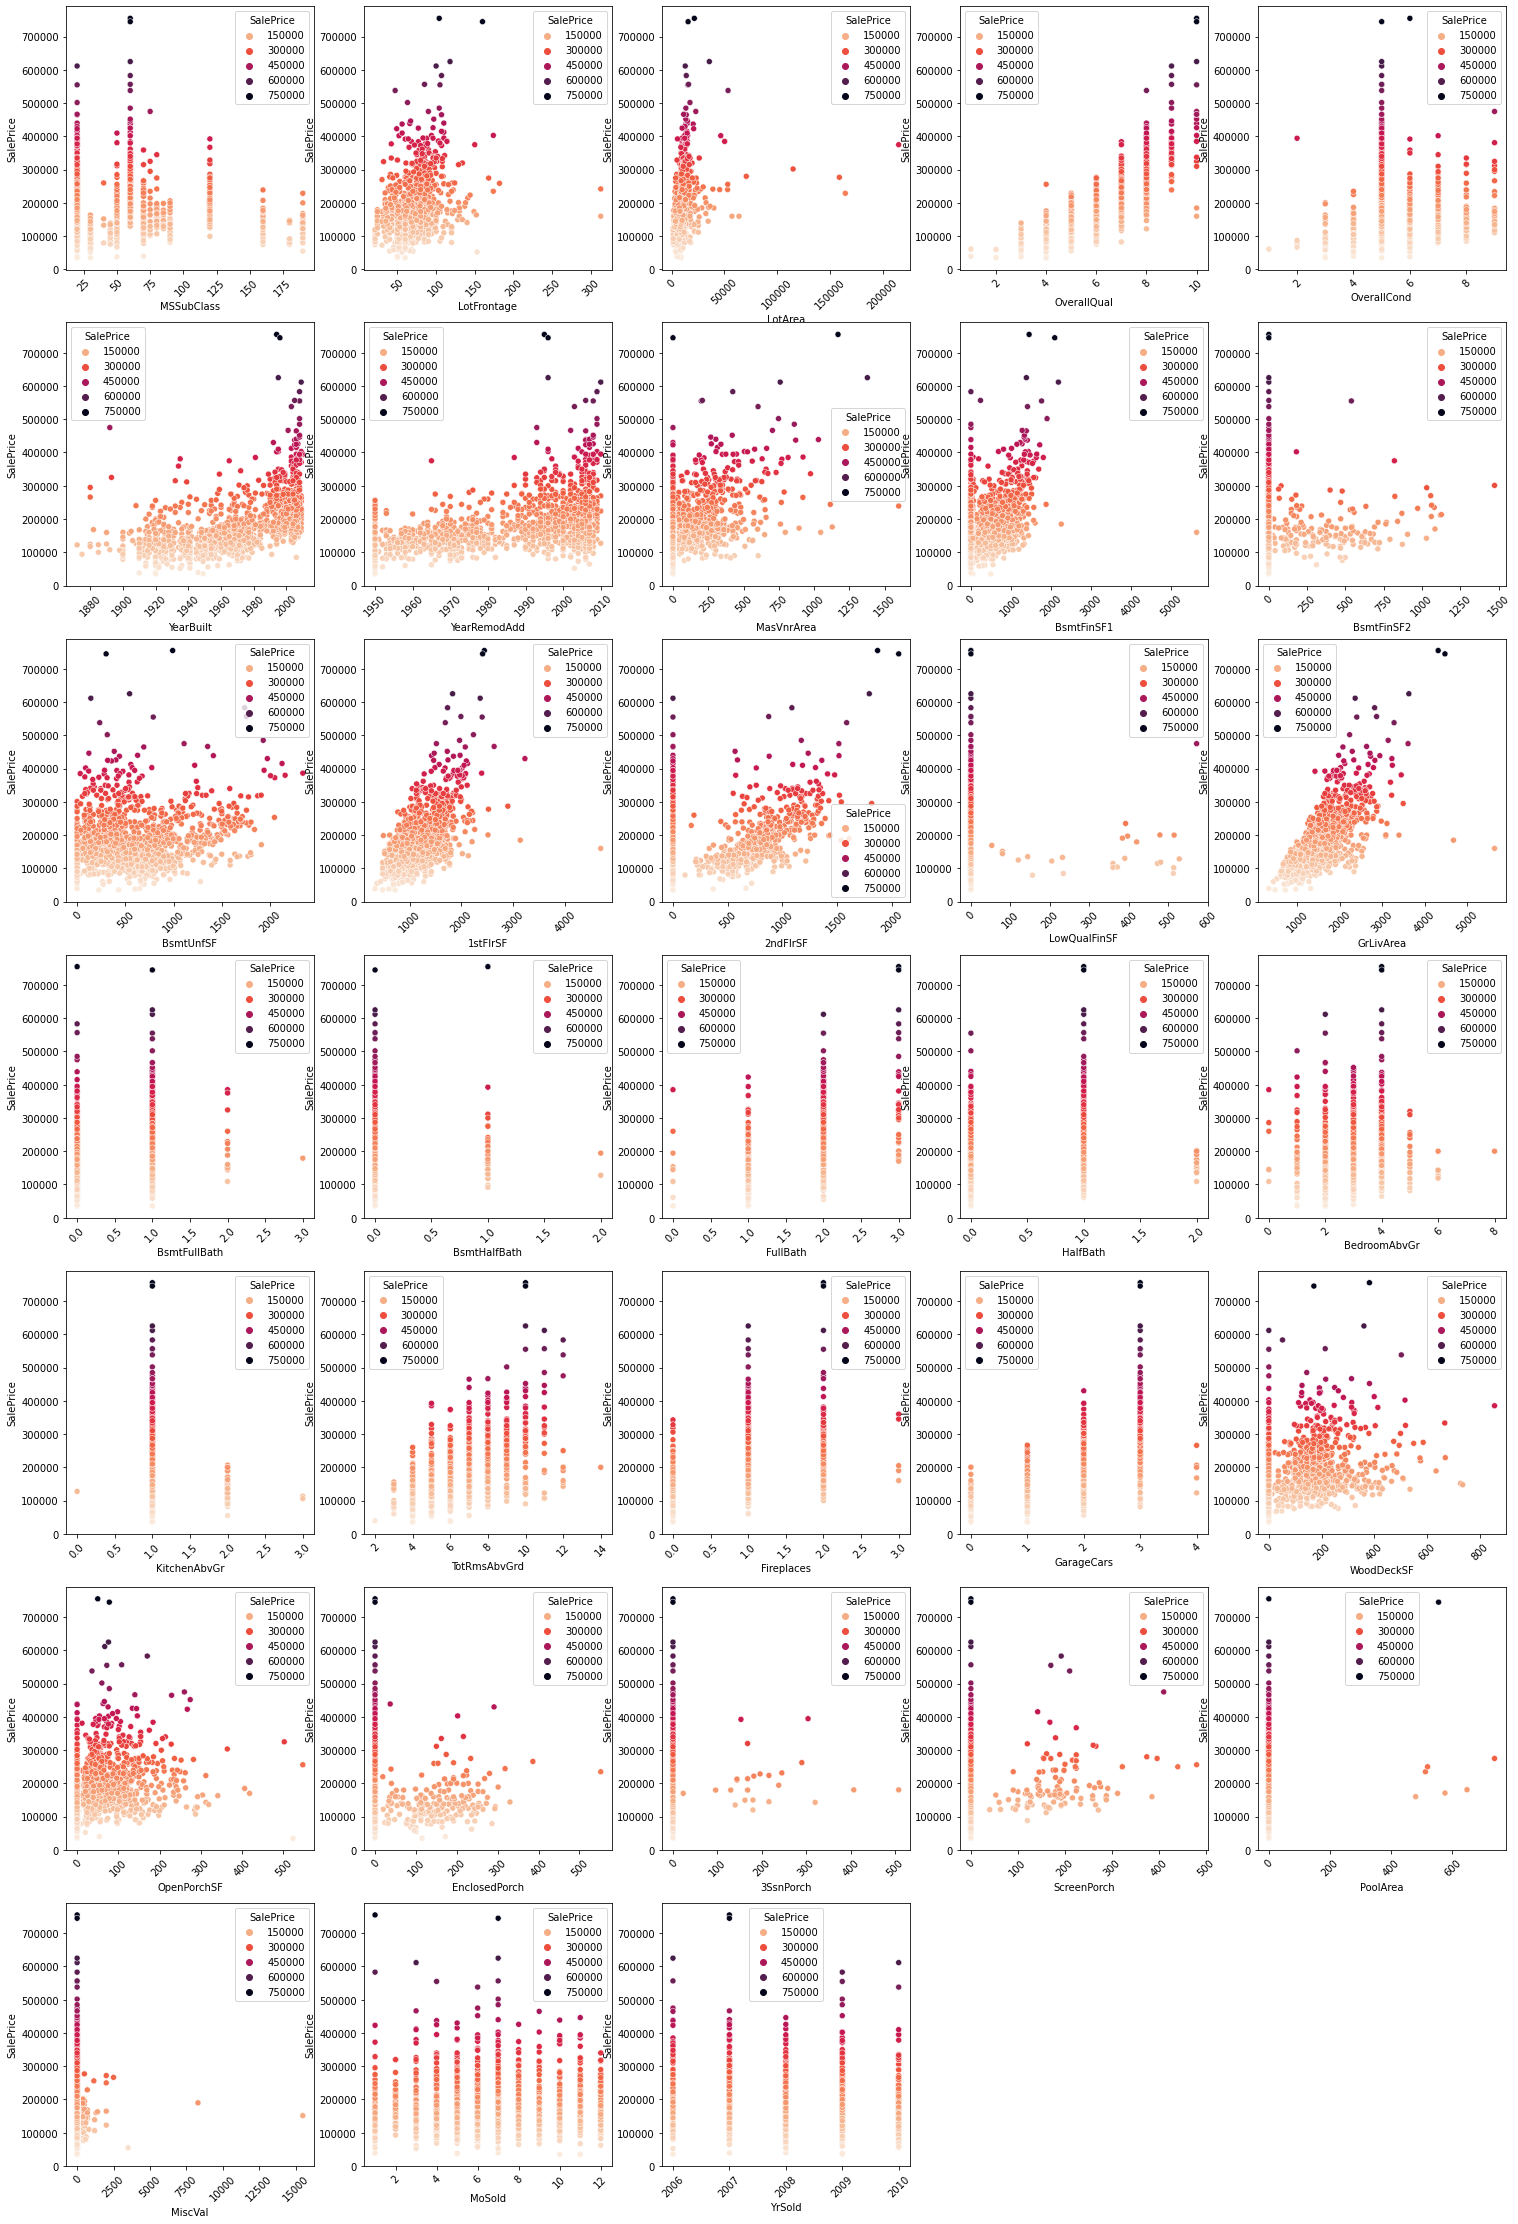

In [ ]:
plot_numerical_by_target(train_df, "SalePrice", get_numerical(train_df, ["Id", "SalePrice"]))

From these graphs we can see few interesting things:
* `MSSubClass` seem to have no major impact on the price, and it has low correlation with the price.
* By looking at `LotArea`, most of the values between 0-50K square feet, so we can not understand how large lot areas will impact the price.
* `LotArea` which represent the size of the whole property does not seem to have impact on the price of the property, unlike we would assume.
* The overall quality of the house does affect it's price.
* The overall condition of the house has small impact on the price. And the most expensive houses rated with average condition.
* Year of building and remodeling has small impact on the price. And they seem to affect the price in simillar ways. It could make sense in which when someone remodeling it's house, it imedietly increase the house's price. We can try to combine them into one feature `YearLstCnst` (Year of last constructions). Also we can see in the description of the data that the `YearRemodAdd` is same as construction if there were no construction.
* `BsmtFinSF2` appeare to have most of it's values at zero, it has low correlation with the price.
* First and second floors sizes seem to have a good impact on the price, also they look simillar to general living area, we will check it further.
* In terms of amount of fireplaces, it seem that the amount does not a lot important, but if the propery does have it or not seem to be important.
* Amount of cars could fit in the garage seem to be important on house's price.
* We do not have enough knowledge on houses with pool.
* In `LowQualFinSF` feature most of the values are `0`, so we can not understand something about it.
* Year and month of sold does not seem to have big impact on the price.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["MSSubClass", "BsmtFinSF2", "OverallCond", "LowQualFinSF"])

### `YearBuilt` and `YearRemodAdd`
As said before, we will combined these feature into one feature `YearLstCnst`.

In [ ]:
for df in [train_df, test_df]:
  df["YearLstCnst"] = df[["YearBuilt", "YearRemodAdd"]].max(axis=1)
train_df, test_df = drop_features([train_df, test_df], ["YearBuilt", "YearRemodAdd"])
display(train_df["YearLstCnst"])

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1455    2000
1456    1988
1457    2006
1458    1996
1459    1965
Name: YearLstCnst, Length: 1460, dtype: int64

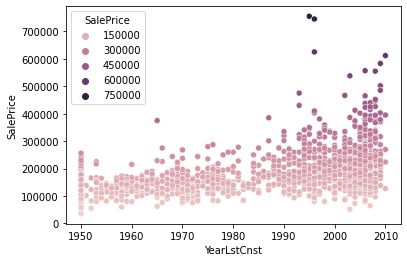

In [ ]:
sns.scatterplot(data=train_df, x="YearLstCnst", y="SalePrice", hue="SalePrice")

### `Fireplaces`
We will convert it to a binary feature which represent whether a house has fireplce or not.

In [ ]:
for df in [train_df, test_df]:
  df.loc[df["Fireplaces"] > 0, "Fireplaces"] = 1

display(train_df[["Fireplaces"]].describe().transpose())
print("Train uniques: {}, Test uniques: {}".format(train_df["Fireplaces"].nunique(), test_df["Fireplaces"].nunique()))

count      mean      std  min  25%  50%  75%  max
Fireplaces  1460.0  0.527397  0.49942  0.0  0.0  1.0  1.0  1.0

Train uniques: 2, Test uniques: 2


### `1stFlrSF`, `2ndFlrSF` and `GrLivArea`
The second floot seem to have some impact on the price, they there is a second floor. The first floor looks pretty familiar with the general living area and all of them have high correlation.  
At this point, we will try to drop both of `1stFlrSF` and `2ndFlrSF`, as `GrLivArea` seem to disribuite more familiar to a noraml distribute.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["1stFlrSF", "2ndFlrSF"])

### Basement's Bathrooms
Most of the properties does not have half bathrooms, almost none of them has 2. At this point we will drop this feature.  
Almost none of the basements has more than one full bath, so we will convert this feature into binary one.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["BsmtHalfBath"])
for df in [train_df, test_df]:
  df.loc[df["BsmtFullBath"] > 0, "BsmtFullBath"] = 1

display(train_df[["BsmtFullBath"]].describe().transpose())
print("Train uniques: {}, Test uniques: {}".format(train_df["BsmtFullBath"].nunique(), test_df["BsmtFullBath"].nunique()))

count      mean       std  min  25%  50%  75%  max
BsmtFullBath  1460.0  0.413699  0.492665  0.0  0.0  0.0  1.0  1.0

Train uniques: 2, Test uniques: 2


### `TotRmsAbvGr` and `BedroomAbvGr`
They both high correlated, `TotRmsAbvGr` has much higher correlation with the price, and it's distribution seem to be more noraml. We will drop `BedroomAbvGr` at this point.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["BedroomAbvGr"])

### `KitchenAbvGd`
Almost all of the houses has one kitchen above ground, and the houses with two kitchens does not have big impact on the price.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["KitchenAbvGr"])

### `YrSold` and `MoSold`
We can see that the year and month of sold does not correlated with any feature in the data, even not with the price. Also, if we would like to determine with our model a house that have been sold later than the houses we have in our data, or even determine a price inthe future, the year or the month would not help us to predict the right price.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["YrSold", "MoSold"])

### `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea` and `MiscVal`
All of them does not have a lot of values and they seem to do not have much impact on the price, we will drop them.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"])

## Categorical Features Analysis
Now let's count plot the categorical features. And violin plot to see how `SalePrice` is dependent on each feature.

In [ ]:
def get_categorical(df, exclude=[]):
  df = df.drop(exclude, axis=1)
  numerical = []
  for key in df.keys():
    if not np.issubdtype(df[key].dtype, np.number):
      numerical += [key]
  return numerical

In [ ]:
def plot_categorical(df, target, features):
  df = df[features + [target]]
  cols = 2
  rows =  len(features)
  fig, ax = plt.subplots(rows, cols)
  for i, key in enumerate(features):
    sub_ax = sns.countplot(data=df, x=key, ax=ax[i, 0], palette="Set2")
    for p in sub_ax.patches:
      _x = p.get_x() + p.get_width() / 2
      _y = p.get_y() + p.get_height() / 2
      value = "{:d}".format(p.get_height())
      sub_ax.text(_x, _y, value, ha="center")
    ax[i, 0].xaxis.set_tick_params(rotation=45)
    sns.violinplot(x=key, y=target, data=df, ax=ax[i, 1], palette="Set2")
    ax[i, 1].set_title("{} VS. {}".format(key, target))
    ax[i, 1].xaxis.set_tick_params(rotation=45)

  plt.subplots_adjust(top=2.5, bottom=0, left=0, right=1)
  fig.set_size_inches(20, 100)
  fig.show()

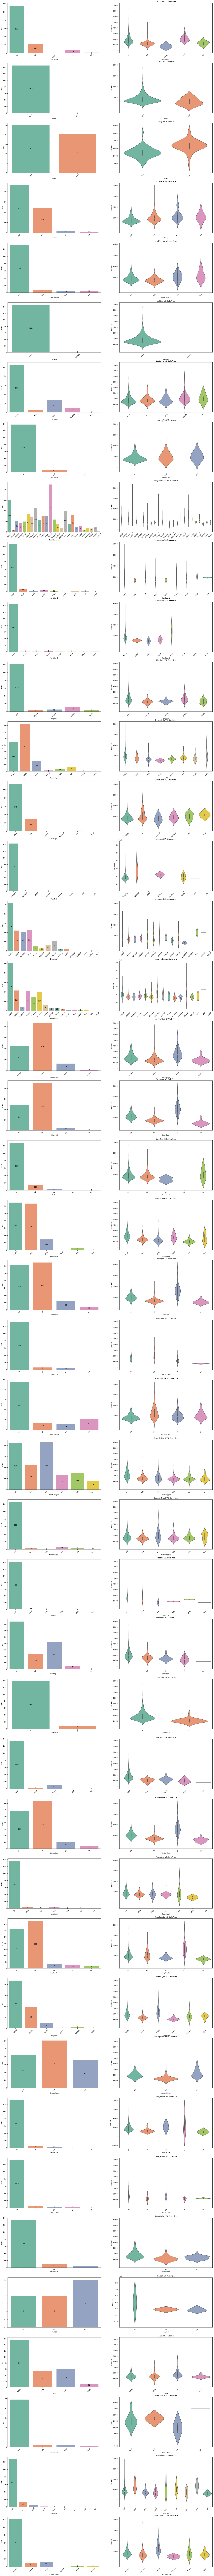

In [ ]:
plot_categorical(train_df, "SalePrice", get_categorical(train_df, ["Id", "SalePrice"]))

We can see that there are a lot of categorical features that almost all values appear withing one value. This could lead to 'white noise', and we might want to drop few of them because over features.  

### Dropping Features
* `Street`: Type of road access to property, only 6 values are different from the overs. At this point, we will drop it.
* `Utilities`: Type of utilities available, all values exept of 1 are `AllPub`.
* `Condition2`:Proximity to various conditions, 1445 out of 1460 values are `Norm`.
* `RoofMatl`: Roof material, 1434 of 1460 values are `CompShg` which is the standart.
* `GarageCond`: Looks very simillar to `GarageQual` and there are less distribution among this feature, at this point we will drop it.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["Street", "Utilities", "Condition2", "RoofMatl", "GarageCond"])

Now let's handle over features:

### `LandSploe`
Has 3 optional values, but one value appears a lot more than the two others, also they seem to affect `SalePrice` pretty much the same way. We can combined these two options and convert this features to a binnary feature to indicate whether the landslope is gentle or not.


In [ ]:
train_df, test_df = replace_feature_vals([train_df, test_df], "LandSlope", {"Gtl":1, "Mod":0, "Sev":0})
display(train_df[["LandSlope"]].describe().transpose())
display(test_df[["LandSlope"]].describe().transpose())

print("Train uniques: {}, Test uniques: {}".format(train_df["LandSlope"].nunique(), test_df["LandSlope"].nunique()))

count      mean       std  min  25%  50%  75%  max
LandSlope  1460.0  0.946575  0.224956  0.0  1.0  1.0  1.0  1.0

count     mean       std  min  25%  50%  75%  max
LandSlope  1459.0  0.95682  0.203332  0.0  1.0  1.0  1.0  1.0

Train uniques: 2, Test uniques: 2


### `HouseStyle`
It has these values:
* `1Story` - One story
* `1.5Fin` - One and one-half story: 2nd level finished
* `1.5Unf` - One and one-half story: 2nd level unfinished
* `2Story` - Two story
* `2.5Fin` - Two and one-half story: 2nd level finished
* `2.5Unf` - Two and one-half story: 2nd level unfinished
* `SFoyer` - Split Foyer
* `SLvl` - Split Level

We can see that all the 1 and 1.5 floors distribuite simillar, as well as 2 and 2.5 floors, we will combine each.

In [ ]:
train_df, test_df = replace_feature_vals([train_df, test_df], "HouseStyle", {"1.5Fin":"1Story", "1.5Unf":"1Story", "2.5Fin":"2Story", "2.5Unf":"2Story", "SLvl":"SFoyer"})
display(train_df[["HouseStyle"]].describe().transpose())
display(test_df[["HouseStyle"]].describe().transpose())

count unique     top freq
HouseStyle  1460      3  1Story  894

count unique     top freq
HouseStyle  1459      3  1Story  910

### `RoofStyle`
Has 6 options, 2 values are common and the other less.  
In terms of `SalePrice` the 4 values `Gambrel`, `Mansard`, `Flat`, and `Shed` affect `SalePrice` in simillar way, we will combined them to one option `Other`.

In [ ]:
train_df, test_df = combine_categorical_by_threshold([train_df, test_df], "RoofStyle", 13)
display(train_df[["RoofStyle"]].describe().transpose())
display(test_df[["RoofStyle"]].describe().transpose())

print("Train uniques: {}, Test uniques: {}".format(train_df["RoofStyle"].nunique(), test_df["RoofStyle"].nunique()))

count unique    top  freq
RoofStyle  1460      3  Gable  1141

count unique    top  freq
RoofStyle  1459      3  Gable  1169

Train uniques: 3, Test uniques: 3


### `Exterior1st`
We can see 5 options are not common, we will combine them as `Other`.

In [ ]:
train_df, test_df = train_df, test_df = combine_categorical_by_threshold([train_df, test_df], "Exterior1st", 10)
display(train_df[["Exterior1st"]].describe().transpose())
display(test_df[["Exterior1st"]].describe().transpose())

count unique      top freq
Exterior1st  1460     11  VinylSd  515

count unique      top freq
Exterior1st  1458     11  VinylSd  510

### `Exterior2nd`
As well, 6 options have less than 10 values, we will combine them as `Other`.

In [ ]:
train_df, test_df = combine_categorical_by_threshold([train_df, test_df], "Exterior2nd", 10)
display(train_df[["Exterior2nd"]].describe().transpose())
display(test_df[["Exterior2nd"]].describe().transpose())

count unique      top freq
Exterior2nd  1460     11  VinylSd  504

count unique      top freq
Exterior2nd  1458     12  VinylSd  510

We can see that the test dataset has some value in `Exterior2nd` that the train set does not have, let's see which one.

In [ ]:
print("train:", pd.unique(train_df["Exterior2nd"].sort_values()))
print()
print("test:", pd.unique(test_df["Exterior2nd"].sort_values()))

train: ['AsbShng' 'BrkFace' 'CmentBd' 'HdBoard' 'MetalSd' 'Other' 'Plywood'
 'Stucco' 'VinylSd' 'Wd Sdng' 'Wd Shng']

test: ['AsbShng' 'Brk Cmn' 'BrkFace' 'CmentBd' 'HdBoard' 'MetalSd' 'Other'
 'Plywood' 'Stucco' 'VinylSd' 'Wd Sdng' 'Wd Shng' nan]


`Brk Cmn` is the 'bad' value, we can not determine how it will affect the price of the house, for now, we will replace it with 'Other'.  
Later on, we will try to convert it with a value based on houses sold in the same area or houses of the same class. 

In [ ]:
train_df, test_df = replace_feature_vals([train_df, test_df], "Exterior2nd", {"Brk Cmn":"Other"})
display(train_df[["Exterior2nd"]].describe().transpose())
display(test_df[["Exterior2nd"]].describe().transpose())

count unique      top freq
Exterior2nd  1460     11  VinylSd  504

count unique      top freq
Exterior2nd  1458     11  VinylSd  510

### `ExterCond`
Indicates on the exterior material condition, `Good` and `Average` conditions appear to affect `SalePrice` pretty much the same, and `Poor` has only one appearance, and it appears to be close to the `Fair` mean.

In [ ]:
train_df, test_df = replace_feature_vals([train_df, test_df], "ExterCond", {"Po":"Fa", "Gd":"TA"})
display(train_df[["ExterCond"]].describe().transpose())
display(test_df[["ExterCond"]].describe().transpose())

count unique top  freq
ExterCond  1460      3  TA  1428

count unique top  freq
ExterCond  1459      3  TA  1409

### `BsmtCond`
The `Poor` value appears only twice in the data, it seems to be similar to fair so we will combine them.

In [ ]:
train_df, test_df = replace_feature_vals([train_df, test_df], "BsmtCond", {"Po":"Fa"})
display(train_df[["BsmtCond"]].describe().transpose())
display(test_df[["BsmtCond"]].describe().transpose())

count unique top  freq
BsmtCond  1423      3  TA  1311

count unique top  freq
BsmtCond  1414      3  TA  1295

### `Heating` and `HeatingQC`
* `Heating`: Type of heating, almost all of the values appear to be `GasA` which means 'Gas forced warm air furnace', we will drop these features.
* `HeatingQC` has one poor value which is similar to fair.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], "Heating")
train_df, test_df = replace_feature_vals([train_df, test_df], "HeatingQC", {"Po":"Fa"})
display(train_df[["HeatingQC"]].describe().transpose())
display(test_df[["HeatingQC"]].describe().transpose())

count unique top freq
HeatingQC  1460      4  Ex  741

count unique top freq
HeatingQC  1459      4  Ex  752

### `Electrical`
There are not a lot of data, and it seems that the price dependent on the fuse box options in a similar way, also the mix option has only one value.  
We will convert this feature to a binary one, which means standard or not.


In [ ]:
train_df, test_df = combine_categorical_by_threshold([train_df, test_df], "Electrical", 100)
train_df, test_df = replace_feature_vals([train_df, test_df], "Electrical", {"SBrkr":1, "Other":0})
display(train_df[["Electrical"]].describe().transpose())
display(test_df[["Electrical"]].describe().transpose())
print("Train uniques: {}, Test uniques: {}".format(train_df["Electrical"].nunique(), test_df["Electrical"].nunique()))

count      mean      std  min  25%  50%  75%  max
Electrical  1459.0  0.914325  0.27998  0.0  1.0  1.0  1.0  1.0

count      mean      std  min  25%  50%  75%  max
Electrical  1459.0  0.916381  0.27691  0.0  1.0  1.0  1.0  1.0

Train uniques: 2, Test uniques: 2


### `GarageType`
The `Detached` and `Carport` values appear to be similar, and a carport is an outside garage, which can be considered as detached parking.


In [ ]:
train_df, test_df = replace_feature_vals([train_df, test_df], "GarageType", {"CatPlot":"Detchd"})
display(train_df[["GarageType"]].describe().transpose())
display(test_df[["GarageType"]].describe().transpose())

count unique     top freq
GarageType  1379      6  Attchd  870

count unique     top freq
GarageType  1383      6  Attchd  853

### `GarageQual`
We will combine `Poor` with `Fair` quality, and `Excellent` with `Good`.

In [ ]:
train_df, test_df = replace_feature_vals([train_df, test_df], "GarageQual", {"Fa":"Po", "Ex":"Gd"})
display(train_df[["GarageQual"]].describe().transpose())
display(test_df[["GarageQual"]].describe().transpose())

count unique top  freq
GarageQual  1379      3  TA  1311

count unique top  freq
GarageQual  1381      3  TA  1293

### `BsmtFinType2`
Most of the values appear to be in one column `Unfinished`, and as we earlier dropped the `BsmtFinSF2` feature, we will drop this one as well.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["BsmtFinType2"])

### `PoolQC` and `MiscFeature`
They have a lot of missing values and earlier we dropped  `PoolArea` and `MiscVal`, so we will drop those too.

In [ ]:
train_df, test_df = drop_features([train_df, test_df], ["PoolQC", "MiscFeature"])

## Furthur Analysis
Let's try to see the distribution of `Neighborhood`.

In [ ]:
data = pd.DataFrame()
data["Neighborhood"] = train_df["Neighborhood"].unique()
data["Houses"] = train_df["Neighborhood"].value_counts().values

fig = px.bar(data, x="Neighborhood", y="Houses" ,color="Neighborhood",title="BarPlot Neighborhood")
fig.show()

Now let's see how the `OverallQual` depends on `Neighborhood`.

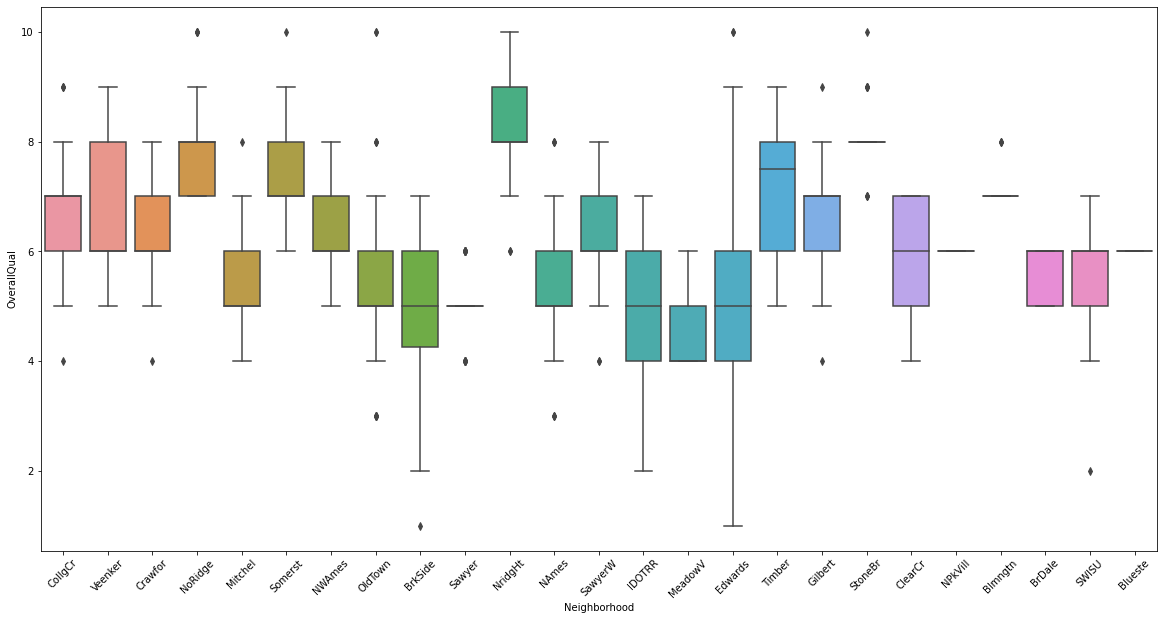

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=train_df, x="Neighborhood", y="OverallQual")
ax.xaxis.set_tick_params(rotation=45)

# Fill NA
First of all, we will fill the training set, and later on the test set.

In [ ]:
def fill_na_with_str(df, keys):
  for key in keys:
    df[key] = df[key].fillna("NA").astype(str)
  return df

def fill_na_with_median(df, keys):
  for key in keys:
    if np.issubdtype(df[key].dtype, np.number):
      df[key] = df[key].fillna(df[key].median(skipna=True)).astype(int)
  return df

def fill_na_with_random_sample(df, keys, values_to_random):
  for key in keys:
    while df[key].isna().sum() > 0:
      df[key] = df[key].map(lambda x: x if not pd.isna(x) else np.random.choice(values_to_random)).astype(type(values_to_random[0]))
  return df

## Filling Training Set NA

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  MasVnrAr

We can see that we have 1460  entries in the dataset, with 50 features (exclude `Id` and `SalePrice`).  
Also, by observing the data, it looks like there are null values.
Let's see which features and how many.

In [ ]:
def print_null_count(df):
  entries_count = len(df) # amount of entries in the dataset
  null_count = 0          # count how many features has null values
  df_null = df.isna().sum().sort_values(ascending=False)
  print("{:10s} \t {:5s} | {:5s}\t| {}".format("Feat. Name", "Count", "%", "Type"))
  for key in df_null.keys():
    if df_null[key] == 0:
      continue
    null_count += 1
    print("{:10s} \t {:5d} | {:.2f}%\t| {}".format(key, df_null[key], df_null[key] * 100 / entries_count, df[key].dtype))
  print("-----------------------------------------")
  print("{} features in total".format(null_count))

In [ ]:
print_null_count(train_df)

Feat. Name 	 Count | %    	| Type
Alley      	  1369 | 93.77%	| object
Fence      	  1179 | 80.75%	| object
FireplaceQu 	   690 | 47.26%	| object
LotFrontage 	   259 | 17.74%	| float64
GarageFinish 	    81 | 5.55%	| object
GarageQual 	    81 | 5.55%	| object
GarageType 	    81 | 5.55%	| object
BsmtExposure 	    38 | 2.60%	| object
BsmtFinType1 	    37 | 2.53%	| object
BsmtCond   	    37 | 2.53%	| object
BsmtQual   	    37 | 2.53%	| object
MasVnrArea 	     8 | 0.55%	| float64
MasVnrType 	     8 | 0.55%	| object
Electrical 	     1 | 0.07%	| float64
-----------------------------------------
14 features in total


There are features in which a null value means that a property is missing this feature, such as `Fence`, `Alley`, etc...  
All of these missing values can be converted into a string that will indicate the same thing.  
These features are:  
`Alley`, `Fence`, `FireplaceQu`, `GarageQual`, `GarageFinish`, `GarageType`, `BsmtCond`, `BsmtExposure`, `BsmtQual`, `BsmtFinType1`.

In [ ]:
fill_na_with_str(train_df, ['Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1'])

print_null_count(train_df)

Feat. Name 	 Count | %    	| Type
LotFrontage 	   259 | 17.74%	| float64
MasVnrArea 	     8 | 0.55%	| float64
MasVnrType 	     8 | 0.55%	| object
Electrical 	     1 | 0.07%	| float64
-----------------------------------------
4 features in total


### `MasVnrType` and `MasVnrArea`

![Screenshot 2020-12-08 151335](https://user-images.githubusercontent.com/52006798/101488242-077dd080-3968-11eb-94ef-bb7dfc2c3cb3.png)


`MasVnrType` is the type of bricks used to cover the exterior of the house, and `MasVnrArea` is the total square foot of it.  
The types are:  
* `BrkCmn` - Brick Common
* `BrkFace` - Brick Face
* `CBlock` - Cinder Block
* `Stone` - Stone
* `None` - None  
Because there is a `None` option, it means the missing values do not mean there is no masonry veneer in the property.

In [ ]:
temp_df = train_df.loc[train_df["MasVnrType"].isna()][["MasVnrType", "MasVnrArea"]]
display(temp_df.transpose())

234  529  650  936  973  977  1243 1278
MasVnrType  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
MasVnrArea  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

We can see that these missing values are related, all the missing values in one column, are missing in the other.  
We will fill first `MasVnrType` with random samples.

In [ ]:
temp_df = fill_na_with_random_sample(temp_df, ["MasVnrType"], train_df["MasVnrType"].values)
display(temp_df.transpose())

234   529    650   936      973   977      1243  1278
MasVnrType  None  None  Stone  None  BrkFace  None  BrkFace  None
MasVnrArea   NaN   NaN    NaN   NaN      NaN   NaN      NaN   NaN

Now after filling `MasVnrType`, we will fill `MasVnrArea` with the mean of houses with similar parameters, `None` will be filled with `0`.

In [ ]:
non_null = train_df.loc[~train_df["MasVnrArea"].isna() & train_df["MasVnrArea"] > 0, "MasVnrArea"]

temp_df["MasVnrArea"] = temp_df["MasVnrType"].map(lambda x: 0 if x == "None" else np.random.choice(non_null))

display(temp_df.transpose())

train_df[["MasVnrType", "MasVnrArea"]] = train_df[["MasVnrType", "MasVnrArea"]].fillna(temp_df)

234   529    650   936      973   977      1243  1278
MasVnrType  None  None  Stone  None  BrkFace  None  BrkFace  None
MasVnrArea     0     0    260     0      200     0      344     0

In [ ]:
print_null_count(train_df)

Feat. Name 	 Count | %    	| Type
LotFrontage 	   259 | 17.74%	| float64
Electrical 	     1 | 0.07%	| float64
-----------------------------------------
2 features in total


### `LotFrontage`

It missing 259 of 1460 values, for now, we will try to fill it with random samples.

In [ ]:
train_df = fill_na_with_random_sample(train_df, ["LotFrontage"], train_df["LotFrontage"])
print_null_count(train_df)

Feat. Name 	 Count | %    	| Type
Electrical 	     1 | 0.07%	| float64
-----------------------------------------
1 features in total


The last missing values is in one sample in `Electrical`, we will fill it with random sample from the dataset.

In [ ]:
train_df = fill_na_with_random_sample(train_df, ["Electrical"], train_df["Electrical"])
for df in [train_df, test_df]:
  df["Electrical"] = df["Electrical"].astype(int)
print_null_count(train_df)

Feat. Name 	 Count | %    	| Type
-----------------------------------------
0 features in total


No more NA values in the training set!  


## Filling Testing Set NA

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Alley          107 non-null    object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   int64  
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  BldgType       1459 non-null   object 
 12  HouseStyle     1459 non-null   object 
 13  OverallQual    1459 non-null   int64  
 14  RoofStyle      1459 non-null   object 
 15  Exterior1st    1458 non-null   object 
 16  Exterior2nd    1458 non-null   object 
 17  MasVnrType     1443 non-null   object 
 18  MasVnrAr

We can see that we have 1460 entries in the dataset, with 50 features (exclude `Id`).  
Also, by observing the data, it looks like there are null values. Let's see which features and how many.

In [ ]:
print_null_count(test_df)

Feat. Name 	 Count | %    	| Type
Alley      	  1352 | 92.67%	| object
Fence      	  1169 | 80.12%	| object
FireplaceQu 	   730 | 50.03%	| object
LotFrontage 	   227 | 15.56%	| float64
GarageQual 	    78 | 5.35%	| object
GarageFinish 	    78 | 5.35%	| object
GarageType 	    76 | 5.21%	| object
BsmtCond   	    45 | 3.08%	| object
BsmtQual   	    44 | 3.02%	| object
BsmtExposure 	    44 | 3.02%	| object
BsmtFinType1 	    42 | 2.88%	| object
MasVnrType 	    16 | 1.10%	| object
MasVnrArea 	    15 | 1.03%	| float64
MSZoning   	     4 | 0.27%	| object
Functional 	     2 | 0.14%	| object
BsmtFullBath 	     2 | 0.14%	| float64
GarageCars 	     1 | 0.07%	| float64
Exterior1st 	     1 | 0.07%	| object
SaleType   	     1 | 0.07%	| object
BsmtFinSF1 	     1 | 0.07%	| float64
BsmtUnfSF  	     1 | 0.07%	| float64
Exterior2nd 	     1 | 0.07%	| object
KitchenQual 	     1 | 0.07%	| object
-----------------------------------------
23 features in total


In [ ]:
test_df = fill_na_with_str(test_df, ["Alley", "Fence", "FireplaceQu", "GarageQual", "GarageFinish", "GarageType", "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType1"])
print_null_count(test_df)

Feat. Name 	 Count | %    	| Type
LotFrontage 	   227 | 15.56%	| float64
MasVnrType 	    16 | 1.10%	| object
MasVnrArea 	    15 | 1.03%	| float64
MSZoning   	     4 | 0.27%	| object
BsmtFullBath 	     2 | 0.14%	| float64
Functional 	     2 | 0.14%	| object
GarageCars 	     1 | 0.07%	| float64
SaleType   	     1 | 0.07%	| object
KitchenQual 	     1 | 0.07%	| object
BsmtFinSF1 	     1 | 0.07%	| float64
BsmtUnfSF  	     1 | 0.07%	| float64
Exterior2nd 	     1 | 0.07%	| object
Exterior1st 	     1 | 0.07%	| object
-----------------------------------------
13 features in total


In [ ]:
test_df.loc[test_df["BsmtFullBath"].isna(), ["BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType1", "BsmtFinSF1", "BsmtUnfSF"]]

BsmtCond BsmtExposure BsmtQual BsmtFinType1  BsmtFinSF1  BsmtUnfSF
660       NA           NA       NA           NA         NaN        NaN
728       NA           NA       NA           NA         0.0        0.0

We can see that the properties that missing the `BsmtFullBath` actually does not have a basement.

In [ ]:
for key in ["BsmtFullBath", "BsmtFinSF1", "BsmtUnfSF"]:
  test_df[key] = test_df[key].fillna(0)
print_null_count(test_df)

Feat. Name 	 Count | %    	| Type
LotFrontage 	   227 | 15.56%	| float64
MasVnrType 	    16 | 1.10%	| object
MasVnrArea 	    15 | 1.03%	| float64
MSZoning   	     4 | 0.27%	| object
Functional 	     2 | 0.14%	| object
SaleType   	     1 | 0.07%	| object
GarageCars 	     1 | 0.07%	| float64
Exterior2nd 	     1 | 0.07%	| object
Exterior1st 	     1 | 0.07%	| object
KitchenQual 	     1 | 0.07%	| object
-----------------------------------------
10 features in total


Now we will handle the features missing 1-4 values. For the numerical variables, we will fill with the median, and for the categorical variables, we will fill with random samples. 
Categorical: `MSZoning`, `Functional`, `SaleType`, `Exterior1st`, `Exterior2nd`, `KitchenQual`.  
Numerical: `GarageCars`.

In [ ]:
for key in ["MSZoning", "Functional", "SaleType", "KitchenQual", "Exterior1st", "Exterior2nd"]:
  test_df = fill_na_with_random_sample(test_df, [key], test_df[key])

fill_na_with_median(test_df, ["GarageCars"])

print_null_count(test_df)

Feat. Name 	 Count | %    	| Type
LotFrontage 	   227 | 15.56%	| float64
MasVnrType 	    16 | 1.10%	| object
MasVnrArea 	    15 | 1.03%	| float64
-----------------------------------------
3 features in total


As `LotFrontage` was missing as well in the training set, we will fill it with the same way we did in the training set.

In [ ]:
test_df = fill_na_with_random_sample(test_df, ["LotFrontage"], test_df["LotFrontage"])
print_null_count(test_df)

Feat. Name 	 Count | %    	| Type
MasVnrType 	    16 | 1.10%	| object
MasVnrArea 	    15 | 1.03%	| float64
-----------------------------------------
2 features in total


### `MasVnrType` and `MasVnrArea`

They miss almost the same amount of values, probably in the same entries in the data.

In [ ]:
temp_df = test_df.loc[test_df["MasVnrType"].isna()][["MasVnrType", "MasVnrArea"]]
display(temp_df.transpose())

231  246  422  532  544  581   ... 908  1132 1150 1197 1226 1402
MasVnrType  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
MasVnrArea  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  198  NaN  NaN  NaN

[2 rows x 16 columns]

Before handling the NaN values, let's fill the specific one which only missing `MasVnrType` but not `MasVnrArea`.  
We will fill it with the most common value.

In [ ]:
most_freq_type =  test_df.loc[~(test_df["MasVnrType"].isna()) & (test_df["MasVnrType"] != "None"), "MasVnrType"].mode().iloc[0]

test_df.loc[test_df["MasVnrType"].isna() & test_df["MasVnrArea"] > 0, "MasVnrType"] = most_freq_type

temp_df = test_df.loc[test_df["MasVnrType"].isna()][["MasVnrType", "MasVnrArea"]]
display(temp_df.transpose())

231  246  422  532  544  581   ... 889  908  1132 1197 1226 1402
MasVnrType  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
MasVnrArea  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN

[2 rows x 15 columns]

Now, all the other missing values will be filled in the same way we filled it in the training set.

In [ ]:
temp_df = fill_na_with_random_sample(temp_df, ["MasVnrType"], test_df["MasVnrType"].values)
non_null = test_df.loc[~test_df["MasVnrArea"].isna() & test_df["MasVnrArea"] > 0, "MasVnrArea"]

temp_df["MasVnrArea"] = temp_df["MasVnrType"].map(lambda x: 0 if x == "None" else np.random.choice(non_null))
display(temp_df.transpose())

test_df[["MasVnrType", "MasVnrArea"]] = test_df[["MasVnrType", "MasVnrArea"]].fillna(temp_df)

231      246      422      532   ...     1132  1197  1226     1402
MasVnrType  BrkFace  BrkFace  BrkFace  BrkFace  ...  BrkFace  None  None  BrkFace
MasVnrArea      422      170      200      182  ...      288     0     0      295

[2 rows x 15 columns]

In [ ]:
print_null_count(test_df)

Feat. Name 	 Count | %    	| Type
-----------------------------------------
0 features in total


No more NA values!

# Training

In [ ]:
categorical_ft = ["MSZoning", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "BldgType",
                  "HouseStyle", "RoofStyle", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "CentralAir", "Electrical",
                  "Functional", "Fireplaces", "GarageType", "GarageFinish", "PavedDrive", "Fence", "SaleType", "SaleCondition"]
numerical_ft = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "GrLivArea", "WoodDeckSF", "OpenPorchSF"]
ordinal_ft = ["OverallQual", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "HeatingQC", "BsmtFullBath",
              "FullBath", "HalfBath", "KitchenQual", "TotRmsAbvGrd", "FireplaceQu", "GarageCars", "GarageQual", "YearLstCnst"]
              
all_ft = categorical_ft + numerical_ft + ordinal_ft
print("Categotical", len(categorical_ft))
print("Ordinal", len(ordinal_ft))
print("Numerical", len(numerical_ft))
print("Total", len(all_ft))

Categotical 25
Ordinal 17
Numerical 8
Total 50


Let's split the training set into `X` as features, and `t` as the target.

In [ ]:
# divide the data to features and target
t = train_df['SalePrice'].copy()
X = train_df.drop(['SalePrice', 'Id'], axis=1)

In [ ]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    cv = KFold(n_splits=k, shuffle=True, random_state=1)

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared=False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared=False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()


    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

Now let's divide the features into seperate dataframes, numericals, categoricals, and ordinals. 

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)
print('All Cols:', all_cols)

Numerical Cols: Index(['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'Electrical', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'YearLstCnst'],
      dtype='object')
Categorical Cols: Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')
All Cols: ['MSZoning' 'LotFrontage' 'LotArea' 'Alley' 'LotShape' 'LandContour'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'BldgType'
 'HouseStyle'

As we do not have a lot of samples to based the predictions on, we will use K-Fold Cross Validation rather than LPO.

Let's run cross-validation on all of the data while converting the categorical features into OHE, and normalize the numerical features.  
As we do not have a lot of samples in our training set, we will use K-Fold cross-validation.  
Let's see how the validation looks with 10-K-Fold.

In [ ]:
# use column transformer to insert different transformers for each column

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

mean cv val score: 0.82
mean cv val loss 31588.53
mean cv train score: 0.88
mean cv train loss 27278.16


We can see that the training data maintain a stable loss and score over the different folds, as expected because the different training sets in each fold have a lot of samples in common, while the validation set in each fold has completely different samples. Still, the validation looks somewhat stable.

Now let's try to see how the different polynomial degrees will affect the data.  
We have a lot of features so let's try with a lower degree at first (5-degree).  
We will use cross-validation (10-K-Fold) as well to validate how the polynomial degree affects the model.

In [ ]:
# show graph of score and loss by plynomial degree of numerical features
def show_degree_graphs_cv_train(X, t, model, k, max_degree=10):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    
    val_train_score_loss_df = pd.DataFrame(columns=['degree', 'split', 'score', 'loss'])
    for i in tqdm(range(1, max_degree), desc='Poly Degree'):
        ct_enc_std_poly = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard_poly", make_pipeline(PolynomialFeatures(degree=i), StandardScaler()), numerical_cols)])
        model_pipe = make_pipeline(ct_enc_std_poly, model)
        val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=k, show_score_loss_graphs=False, use_pbar=False)
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'train', train_score, train_loss]
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'cv', val_score, val_loss]

    fig = px.line(val_train_score_loss_df, x='degree', y='score', color='split')
    fig.show()
    fig = px.line(val_train_score_loss_df, x='degree', y='loss', color='split')
    fig.show()
    
show_degree_graphs_cv_train(X, t, SGDRegressor(random_state=1), k=10 ,max_degree=5)

We can see that the model does not perform well when we add polynomial degree at any level, we will remain with 1-degree of each feature.

We have a lot of features, let's try to find the most significant feature to affect the model and train with them.  
We will validate each model with its features again with 10-K-Fold cross-validation.  
We will use the forward feature selection method using RFE to choose each time a greater number of feature that was most significant.

In [ ]:
def select_features(x, t, k=10):
  initial_state = 10
  features = None
  scores = pd.DataFrame(columns=["num", "val_score", "val_loss", "train_score", "train_loss"])
  for i in tqdm(range(initial_state, len(x.keys()) + 1), desc='Feature Selection'):
    selector = RFE(SGDRegressor(random_state=1), n_features_to_select=i).fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=k, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    if i == initial_state or mean_val_score > scores["val_score"].max():
      features = selector.support_
    scores.loc[i] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["num"], y=scores["val_score"]))
  fig.update_xaxes(title_text="Number of features selected")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  return features, scores["val_score"].max()

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X))

best_model_ft, best_score = select_features(X_encoded, t, k=10)
print(X.loc[:, best_model_ft].keys())
print("Number of features: {} with score {}".format(len(X.loc[:, best_model_ft].keys()), best_score))

Index(['MSZoning', 'LotFrontage', 'Alley', 'LandSlope', 'Neighborhood',
       'Condition1', 'OverallQual', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'CentralAir', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'Fence', 'SaleType'],
      dtype='object')
Number of features: 25 with score 0.7716188054994961


We can see that the model perform best with 25 features.

Now let's try to change the hyper-paramtrics of SGD-Regressor.

In [ ]:
def select_lr(x, t, k=10):
  scores = pd.DataFrame(columns=["lr", "val_score", "val_loss", "train_score", "train_loss"])
  init_state = 0.0001
  final_state = 0.1
  step = 0.0001
  
  for i in tqdm(np.arange(init_state, final_state + step, step), desc='Learning Rate'):
    selector = SGDRegressor(random_state=1, eta0=i, learning_rate="constant").fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=k, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    scores.loc[len(scores)] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["lr"], y=scores["val_score"]))
  fig.update_xaxes(title_text="Learning Rate")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  max_val = scores["val_score"].max()
  best_lr = scores[scores["val_score"] == max_val]["lr"].to_numpy()[0]
  return best_lr, max_val

X_best_ft = X.loc[:, best_model_ft]

numerical_cols = X_best_ft.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_best_ft.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct_enc_std = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X_best_ft))

best_learnrate, best_score = select_lr(X_encoded, t, k=10)
print("Best learning rate: {} with score {}".format(best_learnrate, best_score))

Best learning rate: 0.0004 with score 0.8056423166041193


We can see that the best results is with learning rate of 0.0004 which is the default of SGDRegressor.  
Let's try to play with the `max_iter` parameter.

In [ ]:
def select_max_iter(x, t, k=10, lr=0.0001):
  scores = pd.DataFrame(columns=["iter", "val_score", "val_loss", "train_score", "train_loss"])
  init_state = 500
  final_state = 10000
  step = 100
  for i in tqdm(np.arange(init_state, final_state + step, step), desc='Max Iterations'):
    selector = SGDRegressor(random_state=1, max_iter=i, eta0=lr, learning_rate="constant").fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=k, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    scores.loc[len(scores)] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["iter"], y=scores["val_score"]))
  fig.update_xaxes(title_text="Max iterations")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  max_val = scores["val_score"].max()
  best_iter = scores[scores["val_score"] == max_val]["iter"][0]
  return best_iter, max_val

  return best_iter

best_max_iter, best_score = select_max_iter(X_encoded, t, k=10, lr=best_learnrate)
print("Best max iteration: {} with score of {}".format(best_max_iter, best_score))

Best max iteration: 500.0 with score of 0.8056423166041193


We get the same score in each model, so we will use the default of SGDRegressor which is 1000.  
Now let's try to change `alpha` which is the regularization term of SGDRegressor.

In [ ]:
def select_alpha(x, t, k=10, lr=0.0001):
  scores = pd.DataFrame(columns=["alpha", "val_score", "val_loss", "train_score", "train_loss"])
  init_state = 0.0001
  final_state = 0.1
  step = 0.0001
  for i in tqdm(np.arange(init_state, final_state + step, step), desc='Alpha'):
    selector = SGDRegressor(random_state=1, alpha=i, eta0=i, learning_rate="constant").fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=k, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    scores.loc[len(scores)] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["alpha"], y=scores["val_score"]))
  fig.update_xaxes(title_text="Alpha")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  max_val = scores["val_score"].max()
  best_alp = scores[scores["val_score"] == max_val]["alpha"].to_numpy()[0]
  return best_alp, max_val

  return best_alp

best_alpha, best_score = select_alpha(X_encoded, t, k=10, lr=best_learnrate)
print("Best alpha: {} with score {}".format(best_alpha, best_score))

Best alpha: 0.0004 with score 0.8056273751873698


We can see that the best score is when the alpha parameter is 0.0004

# Final Model
Now that we know which are the best features to use with our model, and what are the best parameters, let's train our model with these features and parameters on the whole training set and then predict the test samples.

In [ ]:
features = X.loc[:, best_model_ft].keys()
print(len(features))
features

25


Index(['MSZoning', 'LotFrontage', 'Alley', 'LandSlope', 'Neighborhood',
       'Condition1', 'OverallQual', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'CentralAir', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'Fence', 'SaleType'],
      dtype='object')

In [ ]:
t_train = train_df["SalePrice"].copy()
X_train = train_df.drop(["SalePrice", "Id"], axis=1)
X_train = X_train[features]
display(X_train)

MSZoning  LotFrontage Alley  ...  GarageCars  Fence SaleType
0          RL         65.0    NA  ...           2     NA       WD
1          RL         80.0    NA  ...           2     NA       WD
2          RL         68.0    NA  ...           2     NA       WD
3          RL         60.0    NA  ...           3     NA       WD
4          RL         84.0    NA  ...           3     NA       WD
...       ...          ...   ...  ...         ...    ...      ...
1455       RL         62.0    NA  ...           2     NA       WD
1456       RL         85.0    NA  ...           2  MnPrv       WD
1457       RL         66.0    NA  ...           1  GdPrv       WD
1458       RL         68.0    NA  ...           1     NA       WD
1459       RL         75.0    NA  ...           1     NA       WD

[1460 rows x 25 columns]

Now let's train the final model on all the samples in the dataset.

In [ ]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct = ColumnTransformer([
    ("encoding_cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)],
    remainder='passthrough')

X_train_encode = ct.fit_transform(X_train)

final_model = SGDRegressor(random_state=1, alpha=best_alpha, eta0=best_learnrate, learning_rate="constant")

In [ ]:
X_test = test_df.drop("Id", axis=1)
X_test = X_test[features]

X_test_encode = ct.fit_transform(X_test.astype(str))

Make sure the train and test data in the same shape.

In [ ]:
print(X_train.shape)
print(X_test.shape)


(1460, 25)
(1459, 25)


In [ ]:
print(X_train_encode.shape)
print(X_test_encode.shape)


(1460, 117)
(1459, 117)


In [ ]:
final_model.fit(X_train_encode, t_train)
y_train = final_model.predict(X_train_encode)

rmse = mean_squared_error(t_train, y_train, squared=False)
print("Final RMSE: {}".format(rmse))

Final RMSE: 32399.6198828841


In [ ]:
y_test = final_model.predict(X_test_encode)

In [ ]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": y_test
    })
submission.to_csv('submission.csv', index=False)

# Score

![comp](https://user-images.githubusercontent.com/52006798/102217697-a618ad00-3ee5-11eb-8d61-116149e2a92d.png)

![best](https://user-images.githubusercontent.com/52006798/102217699-a6b14380-3ee5-11eb-8296-c0b20a71b3e2.png)

![scores](https://user-images.githubusercontent.com/52006798/102236538-50033400-3efc-11eb-9679-f5ec20cf99c7.png)


# Conclusions
In this assignment, we had to predict the sale price of houses in Ames, Iowa.  
We had about 80 features based on the prediction.  
I have tried to minimize the number of features by looking at the correlation between the features and the target (the price), and how they affect each other, if it looked like a feature have no important impact on the target, or it has a high correlation with another feature, I dropped it.  
Also, I have tried to look for the best hyper-parametric using 10-Fold Cross-Validation rather than with LPO because we did not have a lot of samples based on the prediction.  
During the analysis of the data I have tried to do some steps that turned out to be a mistake:
* I tried to drop the `LotArea` feature, but later got it back because I wanted to fill the NA values in the `Frontage` feature, based on it.
* I tried to normalize the `SalePrice` with the `log` function, as was suggested in some other notebooks, despite we have not learned yet normalize methods.
I got really bad predictions based on this method (as can see in the score section), and when I didn't normalize the `SalePrice` at all the final score was much better.

Also, based on the final score, I think that I did a pretty good analysis work with deciding which feature to drop and transform, despite not using any profiling feature.

# Links
This are some links to websites and notebooks that I used and taking examples of:

* [Aviad's notebooks](https://github.com/aviasd/Machine-Learning-Practices-Afeka-2020)

* [Insperation to fill NA values](https://www.kaggle.com/ashishbarvaliya/house-price-fillna-strategy)

* [Dropping `YrSold` and `MoSold`](https://www.kaggle.com/naninm/houses-price-prediction-top-3#Target-leakage)

* [Calculate median and mean with groupby](https://medium.com/analytics-vidhya/best-way-to-impute-categorical-data-using-groupby-mean-mode-2dc5f5d4e12d)

* [Plotly examples for beginners](https://www.kaggle.com/mahmoudalaa01010101/house-prices-analysis-predic-with-plolty#missing-data)

* [Missing Values, Ordinal data and stories](https://www.kaggle.com/mitramir5/missing-values-ordinal-data-and-stories)

* [Complete_House_Prediction](https://www.kaggle.com/rickyrick/complete-house-prediction)
